# Lumber Prices

* **Data:** `lumber-prices.csv`
* **Description:** Chicago lumber futures per 1000 board feet, in USD, as of some time in 2021. To keep things simple, we're going to say that this is the measurement over a month instead of just one date per month. Basically: each month, how much you'd pay if you bought 125 2x4 boards at the hardware store.
* **Source:** https://tradingeconomics.com/commodity/lumber
* **Columns of interest:**
    * `Open` is the price at the start of the month
    * `High` is the high price over the course of the month
    * `Low` is the low number over the course of the month
    * `Close` is the number at the end of the month

## Read in your data

In [1]:
import pandas as pd

df = pd.read_csv('lumber-prices.csv')
df.head(10)

,open,high,low,close,date
0,$407.00,$424.70,$377.00,$424.70,1996-12-09T00:00:00
1,$426.00,$450.50,$395.00,$411.40,1997-01-02T00:00:00
2,$408.50,$421.50,$382.10,$383.50,1997-02-03T00:00:00
3,$386.00,$389.70,$355.00,$380.50,1997-03-03T00:00:00
4,$378.00,$417.50,$376.50,$403.10,1997-04-01T00:00:00
5,$401.90,$404.40,$370.10,$380.50,1997-05-01T00:00:00
6,$387.50,$393.10,$347.10,$378.00,1997-06-02T00:00:00
7,$380.60,$380.90,$332.00,$343.70,1997-07-01T00:00:00
8,$342.00,$365.90,$341.10,$356.70,1997-08-01T00:00:00
9,$356.70,$364.40,$290.50,$296.60,1997-09-02T00:00:00


## What is the earliest month in this dataset?

We only have one reading per month, so you could also read this as "what is the earliest date in the dataset"

In [2]:
df.date.sort_values().head(1)

0    1996-12-09T00:00:00
Name: date, dtype: object

## What is the most recent month in this dataset?

We only have one reading per month, so you could also read this as "what is the earliest date in the dataset"

In [3]:
df.date.sort_values(ascending=False).head(1)

299    2021-11-01T00:00:00
Name: date, dtype: object

## What 3 months had the highest high lumber price?

In [4]:
df.high = df.high.str.replace('$','')

/var/folders/8w/c7bhb4y56693wcs88hywlmq00000gn/T/ipykernel_55588/2617150009.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.high = df.high.str.replace('$','')


In [5]:
df.high = df.high.astype(float)

In [6]:
highs = df.high.sort_values(ascending=False).head(3)

df[df.high.isin(highs)].date

292    2021-04-01T00:00:00
293    2021-05-03T00:00:00
294    2021-06-01T00:00:00
Name: date, dtype: object

## What 3 months had the lowest low lumber price?

In [7]:
df.low = df.low.str.replace('$','')
df.low = df.low.astype(float)

/var/folders/8w/c7bhb4y56693wcs88hywlmq00000gn/T/ipykernel_55588/993915673.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.low = df.low.str.replace('$','')


In [8]:
lows = df.low.sort_values().head(3)
df[df.low.isin(lows)].date

145    2009-01-02T00:00:00
146    2009-02-02T00:00:00
147    2009-03-02T00:00:00
Name: date, dtype: object

## What is the median "high" lumber price in our dataset?

In [9]:
df.high.median()

329.65

## What is the median "low" lumber price in our dataset?

In [10]:
df.low.median()

286.1

## Plot the maximum "high" lumber price on an annual basis.

<AxesSubplot: xlabel='date_datetime'>

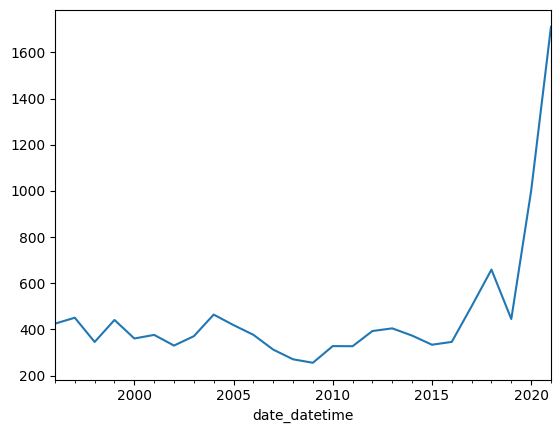

In [11]:
df['date_datetime'] = pd.to_datetime(df.date)

df.resample('Y', on='date_datetime').high.max().plot()

## Plot the lowest "low" lumber price on an annual basis.

<AxesSubplot: xlabel='date_datetime'>

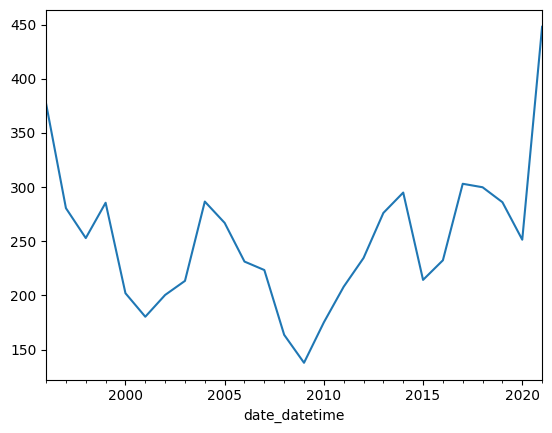

In [12]:
df.resample('Y', on='date_datetime').low.min().plot()

## Plot the median "close" lumber price on an quarterly basis.

/var/folders/8w/c7bhb4y56693wcs88hywlmq00000gn/T/ipykernel_55588/2377160366.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.close = df.close.str.replace('$','')


<AxesSubplot: xlabel='date_datetime'>

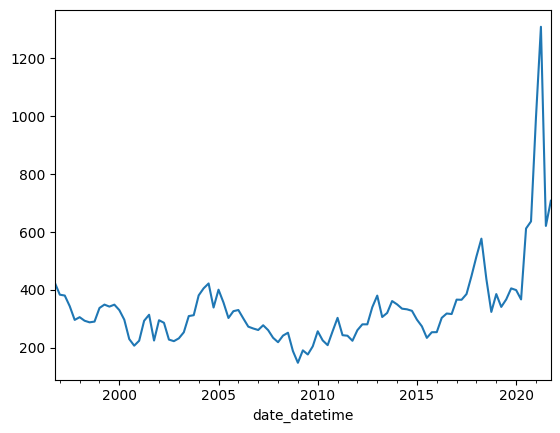

In [13]:
df.close = df.close.str.replace('$','')
df.close = df.close.astype(float)

df.resample('Q', on='date_datetime').close.median().plot()

## What month in our dataset had the largest swing between high and low?

You'll want to create a new column for this one

In [14]:
df['swing'] = df.high - df.low

In [15]:
df[df.swing == df.swing.max()].date_datetime

294   2021-06-01
Name: date_datetime, dtype: datetime64[ns]

## In how many months did lumber prices rise?

If the price was greater at the end of the month than the beginning of the month, we'll say the price rose.

In [16]:
df.open = df.open.str.replace('$','')
df.open = df.open.astype(float)

df['net_change'] = df.close - df.open

/var/folders/8w/c7bhb4y56693wcs88hywlmq00000gn/T/ipykernel_55588/938091729.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.open = df.open.str.replace('$','')


In [17]:
df[df.net_change > 0].date.count()

145

## How many months did lumber prices drop?

If the price was lower at the end of the month than the beginning of the month, we'll say the price dropped.

In [18]:
df[df.net_change < 0].date.count()

155

## In 2020, how many months saw lumber prices rise vs lumber prices fall?

In [19]:
rose = df[(df.date_datetime.dt.year == 2020) & (df.net_change >0)].date_datetime.count()

print(f'In 2020, {rose} months saw a rise in lumber prices.')

In 2020, 8 months saw a rise in lumber prices.


In [20]:
fell = df[(df.date_datetime.dt.year == 2020) & (df.net_change<0)].date_datetime.count()
print(f'In 2020, {fell} months saw a fall in lumber prices.')

In 2020, 4 months saw a fall in lumber prices.


## In 2000, how many months saw lumber prices rise vs lumber prices fall?

In [21]:
rose = df[(df.date_datetime.dt.year == 2000) & (df.net_change >0)].date_datetime.count()
print(f'In 2000, {rose} months saw a rise in lumber prices.')

In 2000, 2 months saw a rise in lumber prices.


In [22]:
fell = df[(df.date_datetime.dt.year == 2000) & (df.net_change<0)].date_datetime.count()
print(f'In 2000, {fell} months saw a fall in lumber prices.')

In 2000, 10 months saw a fall in lumber prices.
